In [1]:
# https://www.tensorflow.org/guide/keras/functional

In [107]:
import matplotlib.pyplot as plt

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
inputs = keras.Input(shape=(10,))
dense = layers.Dense(32, activation='relu')
x = dense(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1)(x)

In [4]:
outputs

<tf.Tensor 'dense_2/Identity:0' shape=(None, 1) dtype=float32>

In [5]:
model = keras.Model(inputs=inputs, outputs=outputs, name='test')

In [6]:
model

In [7]:
model.summary()

Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


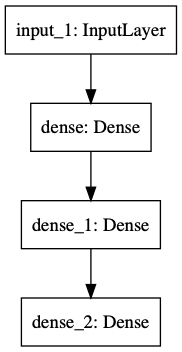

In [8]:
keras.utils.plot_model(model, "my_first_model.png")

In [23]:
# https://stackoverflow.com/questions/60644157/bias-only-layer-in-keras
class BiasLayer(layers.Layer):
    def __init__(self):
        super(BiasLayer, self).__init__()

    def build(self, input_shape):
        self.bias = self.add_weight('bias',
                                    shape=input_shape[1:],
                                    initializer='zeros',
                                    trainable=True)
    def call(self, x):
        return x + self.bias

In [9]:
def get_model():
    inputs = keras.Input(shape=(1,))
    x = layers.Dense(20, activation='relu')(inputs)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [10]:
model1 = get_model()
model2 = get_model()

In [29]:
blayer = BiasLayer()

In [31]:
blayer([3])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.], dtype=float32)>

In [57]:
inputs = keras.Input(shape=(1,))
y1 = model1(inputs)
y2 = model2(inputs)

# addition_layer = layers.add([y1, y2, blayer])
addition_layer = layers.add([y1, y2])
outputs = layers.Dense(1)(addition_layer)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

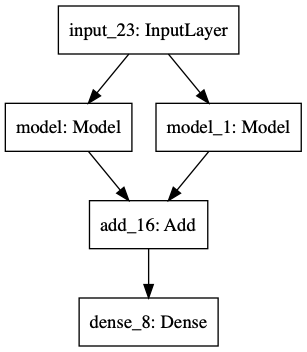

In [58]:
keras.utils.plot_model(ensemble_model, "ensemble_model.png")

In [59]:
ensemble_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
model (Model)                   multiple             61          input_23[0][0]                   
__________________________________________________________________________________________________
model_1 (Model)                 multiple             61          input_23[0][0]                   
__________________________________________________________________________________________________
add_16 (Add)                    (None, 1)            0           model[18][0]                     
                                                                 model_1[18][0]             

In [60]:
X = [
    [1,-1],
    [2,-1],
    [3,-1],
    [1,0],
    [2,0],
    [3,0],
    [1,1],
    [2,1],
    [3,1],
]
X = np.array(X)

In [61]:
X.shape

(9, 2)

In [62]:
y = np.arange(9)[:, np.newaxis]

In [63]:
y.shape

(9, 1)

In [90]:
inputs_0 = keras.Input(shape=(1,), name="0")
inputs_1 = keras.Input(shape=(1,), name="1")
inputs = [inputs_0, inputs_1]
y1 = model1(inputs_0)
y2 = model2(inputs_1)

# addition_layer = layers.add([y1, y2, blayer])
addition_layer = layers.add([y1, y2])
outputs = layers.Dense(1)(addition_layer)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [91]:
ensemble_model.compile(loss='mse', optimizer='adam')

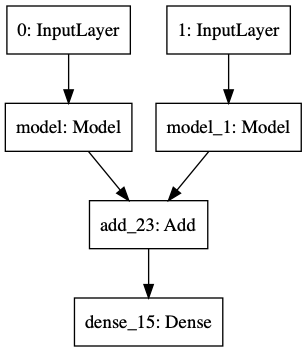

In [92]:
keras.utils.plot_model(ensemble_model, "ensemble_model.png")

In [93]:
ensemble_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
0 (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
1 (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
model (Model)                   multiple             61          0[0][0]                          
__________________________________________________________________________________________________
model_1 (Model)                 multiple             61          1[0][0]                          
___________________________________________________________________________________________

In [121]:
ensemble_history = ensemble_model.fit(
    {"0":X[:,0],"1":X[:,1]},
    y,
    epochs=1000, verbose=False
)

In [122]:
ensemble_history.history['loss'][-10:]

[4.259886665636259e-08,
 4.2054377757949624e-08,
 4.15985681456732e-08,
 4.099653239109102e-08,
 4.056680324993067e-08,
 4.0046042926178416e-08,
 3.9540559271245e-08,
 3.909489265652155e-08,
 3.858727382066718e-08,
 3.814314553096665e-08]

In [132]:
ensemble_yhat = ensemble_model.predict({"0":X[:,0],"1":X[:,1]})

In [133]:
ensemble_yhat

array([[-2.8946996e-04],
       [ 1.0000787e+00],
       [ 2.0001500e+00],
       [ 2.9997227e+00],
       [ 4.0000911e+00],
       [ 5.0001621e+00],
       [ 5.9996943e+00],
       [ 7.0000629e+00],
       [ 8.0001345e+00]], dtype=float32)

In [125]:
y

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [127]:
model = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam')



In [129]:
history = model.fit(X, y, epochs=1000, verbose=False)

In [130]:
history.history['loss'][-10:]

[9.41965845413506e-06,
 9.3930548246135e-06,
 9.369114195578732e-06,
 9.341943950857967e-06,
 9.318308002548292e-06,
 9.290474736189935e-06,
 9.2676282292814e-06,
 9.241046427632682e-06,
 9.215263162332121e-06,
 9.191108802042436e-06]

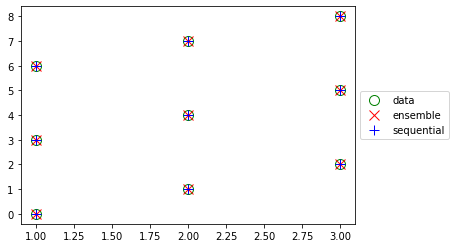

In [143]:
plt.figure()
plt.plot(X[:,0], y, 'go', markerfacecolor='none', markersize=10, label='data')
plt.plot(X[:,0], ensemble_yhat, 'rx', markersize=10, label='ensemble')
plt.plot(X[:,0], yhat, 'b+', markersize=10, label='sequential')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))